In [1]:
%pwd

'C:\\Users\\User\\PycharmProjects\\EXAM_DATA\\DAY_0714'

In [11]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: F6E2-A342

 C:\Users\User\PycharmProjects\EXAM_DATA\DAY_0714 디렉터리

2022-07-14  오전 10:52    <DIR>          .
2022-07-14  오전 10:52    <DIR>          ..
2022-07-14  오전 10:29    <DIR>          .ipynb_checkpoints
2022-07-14  오전 10:52         2,344,554 ex_tem_data.ipynb
               1개 파일           2,344,554 바이트
               3개 디렉터리  157,205,073,920 바이트 남음


# 최고기온 찾기

In [5]:
import csv
f=open('../Data/daegu.csv','r',encoding='euc_kr') # 한글인코딩
data=csv.reader(f, delimiter=',')  # 구분자, 기본값(,)
print(data)
f.close()

In [ ]:
f=open('../Data/daegu.csv','r',encoding='euc_kr') # 한글인코딩
data=csv.reader(f, delimiter=',')  # 구분자, 기본값(,)
for row in data:
    print(row)
f.close()

In [7]:
# 데이터 헤더 저장하기
 # - 데이터 파일에서 여러가지 값들이 어떤 의미를 갖는지 표시한 행
 # - 데잍의 첫 번째 줄에 위치
# 헤더 저장
 # - 함수 : next()
 # - 첫번째 데이터행을 읽어오면서 데이터의 탐색위치를 다음행으로 이동

f=open('../Data/daegu.csv','r',encoding='euc_kr')
data=csv.reader(f)
header=next(data)
print(header)
f.close()

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']


In [13]:
f=open('../Data/daegu.csv','r',encoding='euc_kr')
data=csv.reader(f)
header=next(data)
max_temp= -999      # 최고기온 저장 변수 초기화
max_date=''         # 최고기온날짜 저장 변수 초기화
for row in data:
    if row[-1]=='': 
        row[-1]=-999
        # 데이터가 없는 경우 -999, (패스도 가능)
    row[-1]=float(row[-1])
    if (max_temp<row[-1]):
        max_temp=row[-1]
        max_date=row[0] # 날짜 index:[0]
f.close()
print('기상 관측 이래 대구의 최고 기온이 가장 높았던 날은 {}로 {}도 였습니다.'
      .format(max_date,max_temp))

기상 관측 이래 대구의 최고 기온이 가장 높았던 날은 1942-08-01로 40.0도 였습니다.


# Numpy를 활용한 최고기온 찾기

In [14]:
import numpy as np

f=open('../Data/daegu.csv','r',encoding='euc_kr')
data=csv.reader(f)
header=next(data)
max_temp= -999
max_date=''
max_temp_list=list() # 최고기온 저장
max_temp_date=list() # 날짜정보 저장
for row in data:
    if row[-1]=='': 
        row[-1]=-999
        # 데이터가 없는 경우 -999, (패스도 가능)
    max_temp_list.append(row[-1])
    max_temp_date.append(row[0])
f.close()

max_temp_array=np.array(max_temp_list)              # 리스트를 ndarray 타입으로 변경
max_temp_array=max_temp_array.astype(float)         # 문자열을 float타입으로 변경
max_date_array=np.array(max_temp_date)              # 리스트를 ndarray 타입으로 변경

max_temp=max_temp_array.max()
index=max_temp_array.argmax()               # 최대값의 index

max_date=max_date_array[index]

print('기상 관측 이래 대구의 최고 기온이 가장 높았던 날은',max_date,'로', 
      max_temp,'도 였습니다.')

기상 관측 이래 대구의 최고 기온이 가장 높았던 날은 1942-08-01 로 40.0 도 였습니다.


# 데이터를 리스트에 저장하기

41525


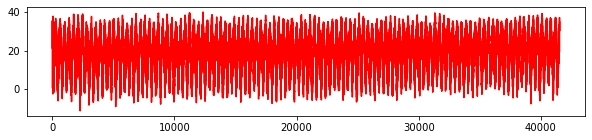

In [16]:
import matplotlib.pyplot as plt

f=open('../Data/daegu.csv','r',encoding='euc_kr')
data=csv.reader(f)
header=next(data)
result=[]

for row in data:
    if row[4] != '':
        result.append(float(row[4]))

print(len(result))
f.close()

plt.figure(figsize=(10,2))
plt.plot(result,'r')
plt.show()

[1, 5, 1, 6, 1, 2, 1, 6, 2, 6]


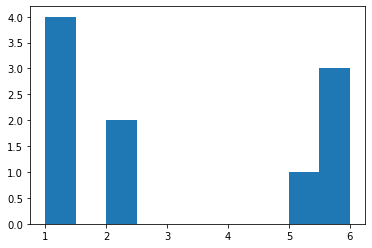

In [18]:
# 히토그램 함수 : hist()
import random

dice = []
for i in range(10):
    dice.append(random.randint(1, 6))
print(dice)
# lt.hist(dice, bins=6)
plt.hist(dice)
plt.show()

# 기온 데이터를 히스토그램으로 표현

### 한글 폰트 사용시 레이블의 ‘-’ 기호 깨지는 현상 해결
#### - plt.rc('axes', unicode_minus=False)
#### - plt.rcParams['axes.unicode_minus'] = False

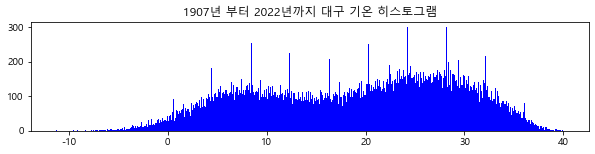

In [28]:
f=open('../Data/daegu.csv','r',encoding='euc_kr')
data = csv.reader(f)
next(data)
result = []

for row in data :
    if row[-1] != '' :                # 최고 기온을 리스트에 저장
        result.append(float(row[-1]))
f.close()



plt.figure(figsize=(10, 2))
plt.hist(result, bins=500, color='blue')    # result에 저장된 값을 히스토그램으로 그림
plt.rc('font', family='Malgun Gothic')      # “Malgun Gothic” For windows
plt.rcParams['axes.unicode_minus'] = False # 레이블에 '-'부호가 깨지는 현상 방지
plt.title("1907년 부터 2022년까지 대구 기온 히스토그램")
plt.show()

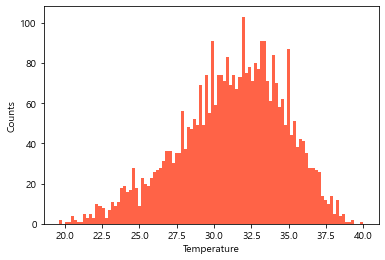

In [27]:
# 8월

f=open('../Data/daegu.csv','r',encoding='euc_kr')
data = csv.reader(f)
next(data)
aug = []

for row in data :
    month = row[0].split('-')[1]
    if row[-1] != '' :
        if month == '08':
            aug.append(float(row[-1]))

f.close()

plt.hist(aug, bins = 100, color = 'tomato')
plt.xlabel("Temperature")         # x축 레이블
plt.ylabel("Counts")              # y축 레이블
plt.show()

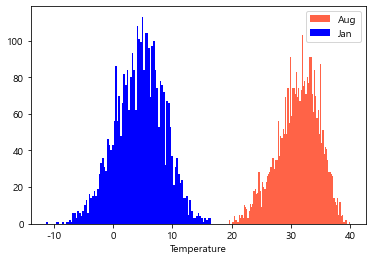

In [29]:
# 1월, 8월

f=open('../Data/daegu.csv','r',encoding='euc_kr')
data = csv.reader(f)
next(data)
aug=[]
jan=[]

for row in data :
    month=row[0].split('-')[1]
    if row[-1]!= '':
        if month=='08':
            aug.append(float(row[-1]))
        if month=='01':
            jan.append(float(row[-1]))

f.close()

plt.hist(aug, bins = 100, color = 'tomato', label='Aug')
plt.hist(jan, bins = 100, color = 'b', label='Jan')
plt.xlabel("Temperature")
plt.rc('axes', unicode_minus=False)
plt.legend()
plt.show()

# 특정 날짜의 최고 기온 찾기

날짜(월 일)를 입력하세요: 10 05


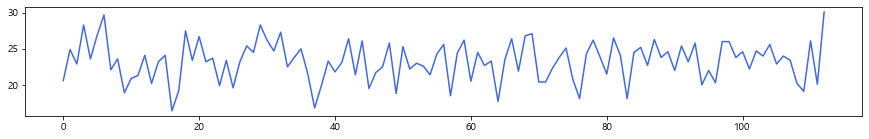

In [35]:
def draw_graph_on_date(month, day):
    f=open('../Data/daegu.csv','r',encoding='euc_kr')
    data = csv.reader(f)
    next(data)
    result = []
    for row in data:
        if row[-1] != '':
            date_string = row[0].split('-')
            if date_string[1] == month and date_string[2] == day:
                result.append(float(row[-1]))
    f.close()
    plt.figure(figsize=(15,2))
    plt.plot(result, 'royalblue')
    plt.show()
month, date = input('날짜(월 일)를 입력하세요: ').split()
draw_graph_on_date(month, date)

## 운영체제 플랫폼 구별 및 한글 폰트 설정
 - platform.system() 함수 사용
 - Windows : 'Windows'
 - Mac : 'Darwin'
 - Linux : 'Linux'

In [39]:
import platform
import matplotlib.font_manager as fm

system_name=platform.system()
if system_name=='Windows':         # Windows 운영체제
    print('Windows OS')
    plt.rc('font', family='Malgun Gothic')
elif system_name=='Darwin':       # Mac OS
    print('Mac OS')
    plt.rc('font',family='AppleGothic')
elif system_name=='Linux':        # Linux
    print('Linux OS')
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'  # => 폰트경로설정
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font',family=font_name)
else:
    print("Not support")

Windows OS


## 2000년 이후 특정일의 최저, 최고 기온 찾기

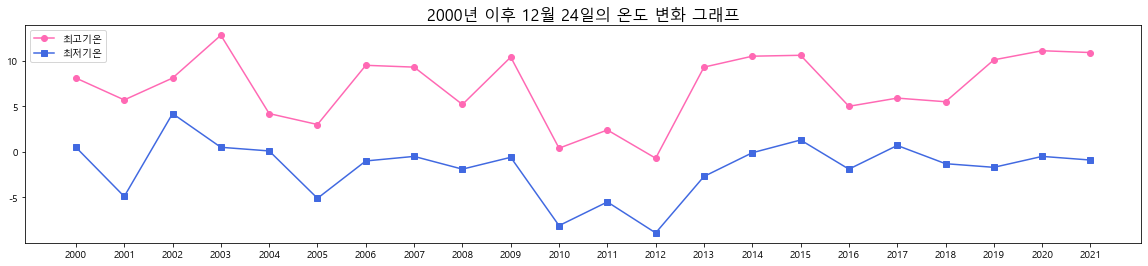

In [51]:
def draw_lowhigh_graph(year, month, day):
    f=open('../Data/daegu.csv','r',encoding='euc_kr')
    data = csv.reader(f)
    next(data)
    high_temp=[]  # 최고기온
    low_temp=[]   # 최저기온
    x_year=[]     # x축연도저장 
    for row in data:
        if row[-1]!='':
            date_string=row[0].split('-')
            if int(date_string[0])>=year:
                if int(date_string[1])==month and int(date_string[2])==day:
                    high_temp.append(float(row[-1]))
                    low_temp.append(float(row[-2]))
                    x_year.append(date_string[0])
                
    f.close()
    
    
    plt.figure(figsize=(20, 4))
    plt.plot(x_year, high_temp, 'hotpink', marker='o', label='최고기온')
    plt.plot(x_year, low_temp, 'royalblue', marker='s', label='최저기온')
    
    # if platform.system() == 'Windows’:
    #     font_name = fm.FontProperties(fname='c:\Windows\Fonts\malgun.ttf').get_name()
    #     plt.rc('font', family=font_name)
    #     # plt.rc(‘font’, family=‘Malgun Gothic’, size=8) # 간단히 맑은 고딕으로 설정
    # else:
    #     # MacOS
    #     plt.rc('font', family='AppleGothic', size=8) # 한글 폰트 사용 For Mac OS
    
    plt.rcParams['axes.unicode_minus'] = False
    plt.title("{0}년 이후 {1}월 {2}일의 온도 변화 그래프".format(year, month, day), size=16)
    plt.legend(loc=2)
    plt.show()
    
    
    
draw_lowhigh_graph(2000, 12, 24)